### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [2]:
# Function to import files
River_dict = call_file() 

2024-11-11 17:17:09.991 python[53576:2069147] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-11 17:17:10.610 python[53576:2069147] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

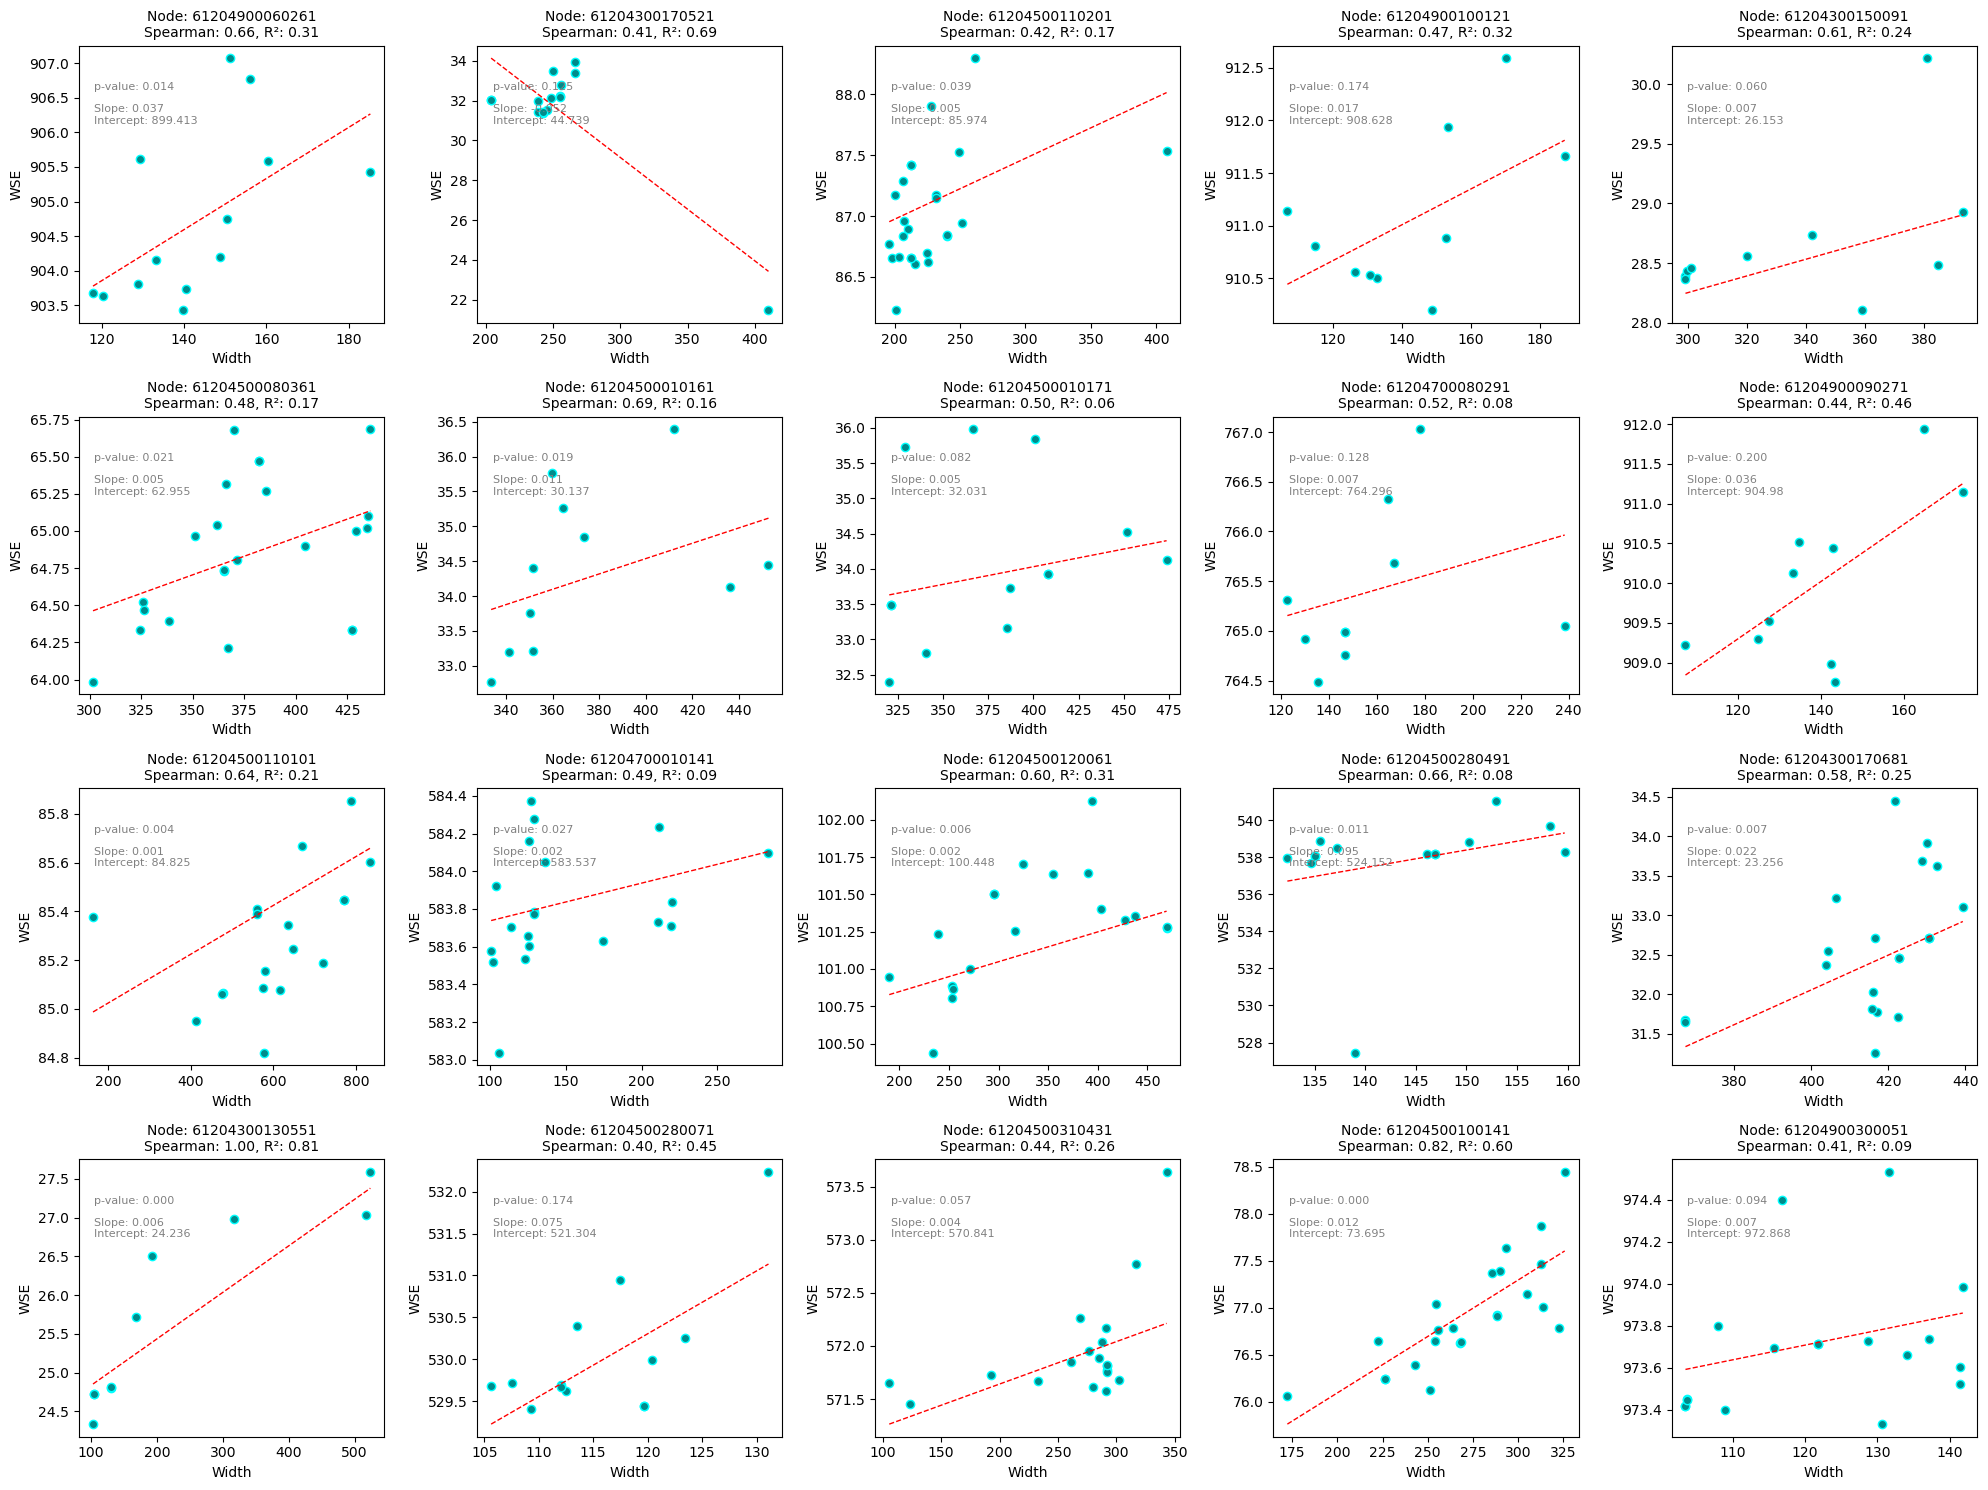

In [3]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict, min_spearman=0.4, min_obs=10, show_p_value=True)

In [4]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

,node_id,spearman_corr,p_value,R2,Slope,Intercept
0,61204900310151,-0.085,0.815,0.105,0.009,989.479
1,61204900310211,0.032,0.922,0.070,-0.021,994.256
2,61204900310231,0.585,0.014,0.315,0.028,989.079
3,61204900310241,0.538,0.014,0.262,0.011,991.080
4,61204900310251,-0.118,0.642,0.004,-0.002,993.726
...,...,...,...,...,...,...
1310,61204500010461,0.609,0.021,0.455,0.007,32.763
1311,61204500010471,0.187,0.458,0.051,0.002,34.337
1312,61204500010481,0.275,0.240,0.103,0.002,34.246
1313,61204500010491,0.692,0.009,0.545,0.006,32.470


In [6]:
export_dataframe(linear_reg,is_geodataframe=False)

DataFrame has been exported to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Cauca/csv/No_Norm/dark_f_030/8_bits/Reg_Cau_N_8030≥10.csv


In [7]:
river_gpkg = call_file()

In [8]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [9]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
# Ensure Slope and Intercept are real numbers and round them to 3 decimals
l_regression['Slope'] = pd.to_numeric(l_regression['Slope'], errors='coerce').round(3)
l_regression['Intercept'] = pd.to_numeric(l_regression['Intercept'], errors='coerce').round(3)
# Format Slope and Intercept to 3 decimal places
l_regression['Slope'] = l_regression['Slope'].round(3).map(lambda x: f"{x:.3f}")
l_regression['Intercept'] = l_regression['Intercept'].round(3).map(lambda x: f"{x:.3f}")

In [10]:
export_dataframe(l_regression,is_geodataframe=True)

GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Cauca/Shps/No_Nomr/8_bits/dark_f_030/All_rho/Reg_Cau_N_8030≥10.gpkg


In [ ]:
l_regression